# 関数近似

pythonのライブラリ利用演習を兼ねて、初歩的な関数近似と、利用上の注意について述べる。

特に、自然科学における利用とデータサイエンス的な観点との差異にも述べる。

<div style="text-align: right;">
    <a href="function_fitting.ipynb">このページのオリジナルのipynbファイル</a>
</div>

## データの準備

2つの値の組の$n$個のデータがあるとする。$(x_1,y_1),\ (x_2, y_2),\ \cdots,\ (x_n,y_n)$

ここでは、$x$と$y$の関係が何かある関数$y=f(x)$で表されるとしてそれを探る問題を考えてみる。

準備として仮想的なデータを用意する。

$\sin x$の値に、ガウシアンノイズを載せたデータを返す関数make_data_by_sin_gaussian()を以下のように作成する。


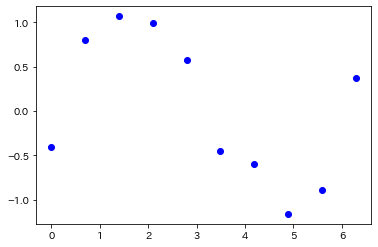

In [6]:
import numpy as np
import random

def make_data_by_sin_gaussian(x):
    # y=sin (x)を計算し、ガウス分布に従うノイズを加える
    y = np.sin(x)
    e = [random.gauss(0, 0.2) for i in range(len(y))]
    # e = np.random.randn(len(x))*0.2
    y += e
    return y

# データ数
n_tr = 10
x = np.linspace(0., np.pi*2., n_tr) # リスト 0から２πまでをn_tr等分した値を一次元配列
y = make_data_by_sin_gaussian(x)

# データの描画
import matplotlib.pyplot as plt
plt.plot(x,y, "ob")

# sinの描画
#n_tr = 100
#x = np.linspace(0., np.pi*2., n_tr)
#plt.plot(x, np.sin(x))

(注)


ノイズの部分
```python
e = [random.gauss(0, 0.2) for i in range(len(y))]
```
は、numpyの乱数発生関数
```python
e = np.random.randn(len(x))*0.2
```
でもよい。こちらの方が繰り返し記述がない分、シンプルかも。


## べき多項式関数近似

データに潜む原理から、べき的な振る舞いを示しているものだと想定し、べき関数での近似を行ってみる。つまり、

$$
 y(x, {\bf w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^{M} w_j x^j
$$

置き、トレーニングデータ$\{(t_n, x_n)\}$, $n=1,\cdots, N$を使って、係数${\bf w} = (w_1,\ w_2,\ \cdots,\ w_n)$を
2乗誤差

$$
E({\bf w}) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,{\bf w}) - t_n\}^2
$$

を最小にするよう${\bf w}$を決める。

このことを最小2乗法と呼ぶ。

pythonのライブラリscikit-learnにあるlinear_modelを用いてみる




### 線形近似

### べき多項式近似

まずは、べき関数へのフィッティングをlinear_modelで行うために、$x$の値に対する各べきの値$x^1,\ x^2,\ x^3,\ \cdots,\ x^n$を行として並べた行列(Vandermonde行列)を作成しておく。

(注)データ分析に慣れている人向け説明：

$n$個の説明変数に対する係数$\{w_i\}$を線形重回帰(multiple linear regression)によって決めるということに相当する。

このことの必要性を理解するために、最初に[社会的データの重回帰分析](multiple_regression.html)について説明する。


In [19]:
# トレーニングデータの数
n_tr = 10
x_tr = np.linspace(0., np.pi*2., n_tr)

# データの作成
y = make_data_by_sin_gaussian(x_tr) #　データ

# 説明変数の作成 (x, x^2, ...x^m) 行列
m=3 # フィッティング関数の次数
power_matrix_x = np.vander(x_tr, m+1)

In [20]:
power_matrix_x

array([[  0.        ,   0.        ,   0.        ,   1.        ],
       [  0.34026092,   0.48738787,   0.6981317 ,   1.        ],
       [  2.72208739,   1.94955149,   1.3962634 ,   1.        ],
       [  9.18704494,   4.38649084,   2.0943951 ,   1.        ],
       [ 21.77669912,   7.79820595,   2.7925268 ,   1.        ],
       [ 42.53261547,  12.18469679,   3.4906585 ,   1.        ],
       [ 73.49635954,  17.54596338,   4.1887902 ,   1.        ],
       [116.70949686,  23.88200571,   4.88692191,   1.        ],
       [174.21359298,  31.19282379,   5.58505361,   1.        ],
       [248.05021344,  39.4784176 ,   6.28318531,   1.        ]])

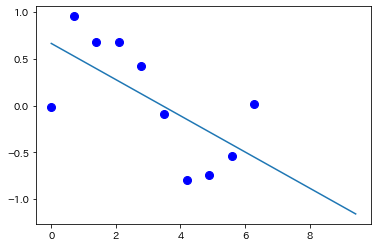

In [14]:
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# 関数フィッティング
lrp = lm.LinearRegression()
lrp.fit(power_matrix_x, y) # 以上が学習（フィッティングにより係数を決定）
# 予測 (下の実線)
x_lrp = np.linspace(0., np.pi*3.0, 100)
y_lrp = lrp.predict(np.vander(x_lrp, m+1))

# データの描画
plt.plot(x_tr, y, "ob", ms=8)
# 近似曲線の描画
plt.plot(x_lrp, y_lrp)

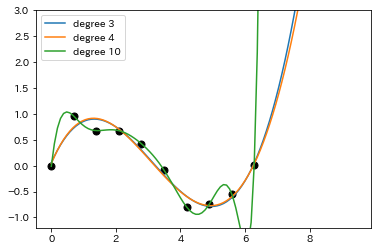

In [16]:
# 高次のべき多項式による近似
plt.plot(x_tr, y , 'ok', ms=7) # データの描画
for deg in [3,4, 10]: # 複数の次数で近似
    lrp.fit(np.vander(x_tr, deg +1), y)
    y_lrp = lrp.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.ylim(-1.2, 3.0)
    # モデルの係数表示
    #print('  '. join(['%.2f' % c for c in lrp.coef_]))


自然科学では、対象となる系のふるまいの裏にはあるシンプルな原理が存在していると考える。今の場合、その原理に基づけば系は$\sin x$のようにふるまうと想定されるとする。

自然科学の場合は、その原理に基づいて$\sin x$に振幅、位相を未定係数としておいて、その係数をデータから推定することを行う。

一方、原理がまったくわからない、あるいは、背後にある要素・要因が複雑で本質的に単純な原理で説明できないような対象の場合はどうであろうか。**適用範囲を適切に設定すれば**、べき関数であっても十分近似でき「予測」には有用であるといえる。



## 補足  (過学習について)

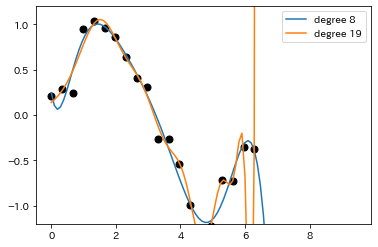

In [8]:
# もっと高次に
plt.plot(x_tr, y , 'ok', ms=7) # データの描画
for deg in [8,n_tr-1]: # 複数の次数で近似
    lrp.fit(np.vander(x_tr, deg +1), y)
    y_lrp = lrp.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend()
    plt.ylim(-1.2, 1.2)

べき関数の次数をデータの数と同じにすれば、原理的には全部のデータ点を通るようにフィッティングできる。が、それでよいか？

このようなフィッティングを「過学習」と呼ぶ。

過学習を防ぐために、高次の項を不必要に重視しないよう重みをつけたり次数を削減したりする方法が考えられている。Ridge回帰、Lasso回帰について次回学習する。

[関数フィッティングその２](function_fitting2.html)

## 演習課題1

- データを$\sin x$にノイズを加えたものから、別のもの（$\sin$以外の関数など）に変えて、フィッティングを試してみなさい。
- データの個数やフィッティング関数のべきを変えて試し、考察しなさい。
- （補足）本来パラメータの数とフィッティング関数のべきとが同じになるとフィッティング関数はデータ点上を通るはずであるが、上記の例では少しずれている。その原因を考察してみよう。

各自の経験に応じてでよいので、Jupyter Notebookで行ったことを記録し、html形式あるいはPDF形式にしてmoodleのページへ提出してください。

初めての人は、次のようなことをレポートしてもよい。

- markdown書式の練習
 - 数式の書法(LaTeXの数式文法)など
- 上記のプログラム例に即したpythonの基本文法学習（プログラムソースの読み解き）
 - pythonの変数、配列（リスト）、numpyの変数（データ構造）、関数定義
 - scikit-learnのlinear_modelについて など
- 関数フィッティングについての学習

など



## 補足：linear_modelへのデータの与え方（計画行列）

上でデータをmodelにあたえるときvanderという関数を使った。

中身を見ればわかるが、あるデータ値$x$に対して、べき関数フィッティングの場合、$x$, $x^2$, $\cdots$, $x^M$の値を横に並べ、各データを1行として、$N$個のデータを行として並べたものを与える。


このような行列を一般に、機械学習では計画行列(design matrix)とよぶ。

$$
  y(x, {\bf w})  = w_1 \phi_1(x) + w_2 \phi_2(x) + \cdots + w_M \phi_M(x)
$$
のように$\phi_1(x)$～$\phi_M(x)$を用意して、その線形結合で目的変数を説明したいとき、
データが$\{x_1, x_2, \cdots, x_N\}$に対して計画行列は

$$
\Phi = \left(
\begin{array}{cccc}
 \phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_M (x_1) \\
 \phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_M (x_2) \\
     \vdots & \vdots & & \vdots \\
 \phi_1(x_N) & \phi_2(x_N) & \cdots & \phi_M (x_N) 
\end{array}
\right)
$$

と定義される。

numpy.vander()はデータリストを与えると、これを一気に作ってくれる。（もちろんべきの基底の時のみだが。）